In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('../data/processed_data.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SKU                           643 non-null    object 
 1   Item ID                       643 non-null    int64  
 2   Publish Status                643 non-null    object 
 3   Product Category              643 non-null    object 
 4   Price                         643 non-null    float64
 5   Buy Box Item Price            643 non-null    float64
 6   MSRP                          643 non-null    float64
 7   Shipping Weight               643 non-null    float64
 8   WPID                          643 non-null    object 
 9   GTIN                          643 non-null    int64  
 10  Shelf Name                    643 non-null    object 
 11  Primary Category Path         643 non-null    object 
 12  Brand                         643 non-null    object 
 13  Offer

In [16]:
data.head()

,SKU,Item ID,Publish Status,Product Category,Price,Buy Box Item Price,MSRP,Shipping Weight,WPID,GTIN,...,Competitor Ship Price,Competitor Last Date Fetched,Condition,Product Type,Impressions,Clicks,Added to Cart,Sales Rank,Transactability Score,Buy Box Win %
0,18084005125,192225608,PUBLISHED,"Beauty, Personal Care, & Hygiene",23.00,19.95,62.06,0.67,18RO2XOOFKW9,18084005125,...,0.0,12-16-24,New,Body Washes & Shower Gels,Very low,Medium,Very low,1712,100,0
1,716170258928,1924068495,PUBLISHED,"Beauty, Personal Care, & Hygiene",34.99,27.00,-1.00,0.50,317SD9S2OQX4,716170258928,...,0.0,12-16-24,New,Concealer Makeup,Very low,Medium,Very low,406,0,0
2,A73,114860506,PUBLISHED,"Beauty, Personal Care, & Hygiene",24.90,15.11,59.99,0.50,338XG8582TXF,651986701391,...,0.0,05-17-24,New,Foundation Makeup,Very low,High,Very low,208,100,0
3,KATZAURACACIAESSSENOIL4OZ,25478983,PUBLISHED,Medicine & Supplements,39.00,49.90,37.25,0.50,6WWA7D9AH8XV,51381888404,...,0.0,12-14-24,New,Aromatherapy & Essential Oils,Very low,Very low,Very low,-1,0,0
4,20714324636,617788010,PUBLISHED,"Beauty, Personal Care, & Hygiene",22.99,24.20,35.00,0.50,1OXH2ZF84KHD,20714324636,...,0.0,12-15-24,New,Foundation Makeup,Very low,Medium,Very low,115,0,0


In [24]:
columns = ['Impressions', 'Clicks', 'Added to Cart']
for column in columns:
    data[column] = data[column].replace('Very high', 20).astype('int')
    data[column] = data[column].replace('High', 40).astype('int')
    data[column] = data[column].replace('Medium', 60).astype('int')
    data[column] = data[column].replace('Low', 80).astype('int')
    data[column] = data[column].replace('Very low', 100).astype('int')
data.head()

,SKU,Item ID,Publish Status,Product Category,Price,Buy Box Item Price,MSRP,Shipping Weight,WPID,GTIN,...,Competitor Ship Price,Competitor Last Date Fetched,Condition,Product Type,Impressions,Clicks,Added to Cart,Sales Rank,Transactability Score,Buy Box Win %
0,18084005125,192225608,PUBLISHED,"Beauty, Personal Care, & Hygiene",23.00,19.95,62.06,0.67,18RO2XOOFKW9,18084005125,...,0.0,12-16-24,New,Body Washes & Shower Gels,100,60,100,1712,100,0
1,716170258928,1924068495,PUBLISHED,"Beauty, Personal Care, & Hygiene",34.99,27.00,-1.00,0.50,317SD9S2OQX4,716170258928,...,0.0,12-16-24,New,Concealer Makeup,100,60,100,406,0,0
2,A73,114860506,PUBLISHED,"Beauty, Personal Care, & Hygiene",24.90,15.11,59.99,0.50,338XG8582TXF,651986701391,...,0.0,05-17-24,New,Foundation Makeup,100,40,100,208,100,0
3,KATZAURACACIAESSSENOIL4OZ,25478983,PUBLISHED,Medicine & Supplements,39.00,49.90,37.25,0.50,6WWA7D9AH8XV,51381888404,...,0.0,12-14-24,New,Aromatherapy & Essential Oils,100,100,100,-1,0,0
4,20714324636,617788010,PUBLISHED,"Beauty, Personal Care, & Hygiene",22.99,24.20,35.00,0.50,1OXH2ZF84KHD,20714324636,...,0.0,12-15-24,New,Foundation Makeup,100,60,100,115,0,0


### For each column with numeric data type, how are the values distributed?

In [25]:
def missing_ratio(df):
    return (df.isnull().mean()).round(1)

def lower_quartiles(df):
    return (df.quantile([0.25]).iloc[0]).round(1)

def median(df):
    return (df.quantile([0.5]).iloc[0]).round(1)

def upper_quartiles(df):
    return (df.quantile([0.5]).iloc[0]).round(1)

num_col_info = data.select_dtypes(include=[np.number])
num_col_info = num_col_info.agg([missing_ratio, 'min', lower_quartiles, median, upper_quartiles, 'max'])
num_col_info

,Item ID,Price,Buy Box Item Price,MSRP,Shipping Weight,GTIN,Reviews Count,Average Rating,Competitor Price,Competitor Ship Price,Impressions,Clicks,Added to Cart,Sales Rank,Transactability Score,Buy Box Win %
missing_ratio,0.000000e+00,0.00,0.00,0.00,0.0,0.000000e+00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
min,1.728412e+07,5.95,3.16,-1.00,0.0,1.312124e+10,0.0,0.0,3.49,-1.00,40.0,20.0,60.0,-1.0,0.0,0.0
lower_quartiles,3.895260e+08,19.00,17.00,-1.00,0.5,1.923330e+11,0.0,0.0,20.40,0.00,100.0,60.0,100.0,179.5,0.0,0.0
median,9.274503e+08,24.00,23.80,26.60,0.5,6.519867e+11,0.0,0.0,29.00,0.00,100.0,60.0,100.0,596.0,100.0,0.0
upper_quartiles,9.274503e+08,24.00,23.80,26.60,0.5,6.519867e+11,0.0,0.0,29.00,0.00,100.0,60.0,100.0,596.0,100.0,0.0
max,1.451827e+10,404.80,404.80,999.99,5.0,8.809845e+12,15181.0,5.0,408.00,20.13,100.0,100.0,100.0,21655.0,100.0,100.0


### For each column with a non-numeric data type, how are the values distributed?

In [26]:
def num_values(df):
    return dict(df.value_counts(dropna=True))

def value_ratios(df):
    return dict((df.value_counts(normalize = True, dropna=True) * 100).round(1).sort_values(ascending = False))

cat_col_info_df = data.select_dtypes(exclude=np.number)
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,SKU,Publish Status,Product Category,WPID,Shelf Name,Primary Category Path,Brand,Offer Start Date,Offer End Date,Item Creation Date,Item Last Updated,Competitor Last Date Fetched,Condition,Product Type
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,"{'18084005125': 1, '773602706822': 1, '2713198...",{'PUBLISHED': 643},"{'Beauty, Personal Care, & Hygiene': 595, 'Oth...","{'18RO2XOOFKW9': 1, '1G1K36Y7UECL': 1, '7I4BEI...","{'All Makeup': 52, 'Premium Foundation': 43, '...","{'('Home Page', 'Beauty', 'Makeup', 'All Makeu...","{'Clinique': 153, 'Estee Lauder': 103, 'Too Fa...","{'09-09-24': 50, '10-10-24': 41, '09-24-24': 4...","{'12-31-49': 629, '12-30-49': 13, '12-29-49': 1}","{'10-02-24': 19, '12-02-24': 15, '11-05-21': 1...","{'12-18-24': 137, '12-17-24': 49, '12-15-24': ...","{'12-16-24': 254, '12-15-24': 73, '09-09-24': ...",{'New': 643},"{'Foundation Makeup': 98, 'Concealer Makeup': ..."
value_ratios,"{'18084005125': 0.2, '773602585250': 0.2, '651...",{'PUBLISHED': 100.0},"{'Beauty, Personal Care, & Hygiene': 92.5, 'Ot...","{'18RO2XOOFKW9': 0.2, '45H6CDUG30F6': 0.2, '70...","{'All Makeup': 8.1, 'Premium Foundation': 6.7,...","{'('Home Page', 'Beauty', 'Makeup', 'All Makeu...","{'Clinique': 23.8, 'Estee Lauder': 16.0, 'Too ...","{'09-09-24': 7.8, '10-10-24': 6.4, '09-24-24':...","{'12-31-49': 97.8, '12-30-49': 2.0, '12-29-49'...","{'10-02-24': 3.0, '12-02-24': 2.3, '11-05-21':...","{'12-18-24': 21.3, '12-17-24': 7.6, '12-15-24'...","{'12-16-24': 39.5, '12-15-24': 11.4, '09-09-24...",{'New': 100.0},"{'Foundation Makeup': 15.2, 'Concealer Makeup'..."


### Task 01: Analyzing Impressions, Clicks, Added to Cart, Sales Rank via Histogram

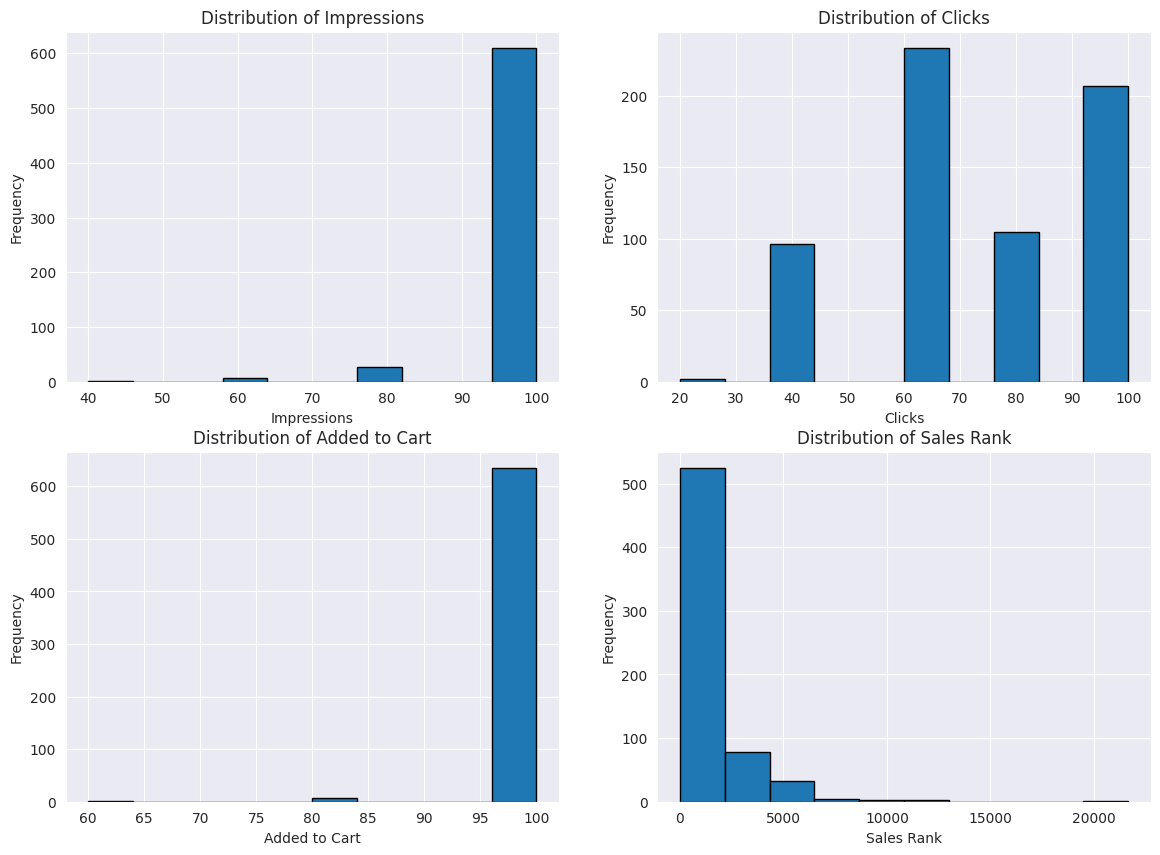

In [34]:
plt.figure(figsize = (14, 10))

plt.subplot(2, 2, 1)
plt.hist(data['Impressions'], edgecolor = 'black', alpha = 1)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['Clicks'], edgecolor = 'black', alpha = 1)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['Added to Cart'], edgecolor = 'black', alpha = 1)
plt.title('Distribution of Added to Cart')
plt.xlabel('Added to Cart')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['Sales Rank'], edgecolor = 'black', alpha = 1)
plt.title('Distribution of Sales Rank')
plt.xlabel('Sales Rank')
plt.ylabel('Frequency')

plt.show()

### Task 02: Correlation matrix analysis

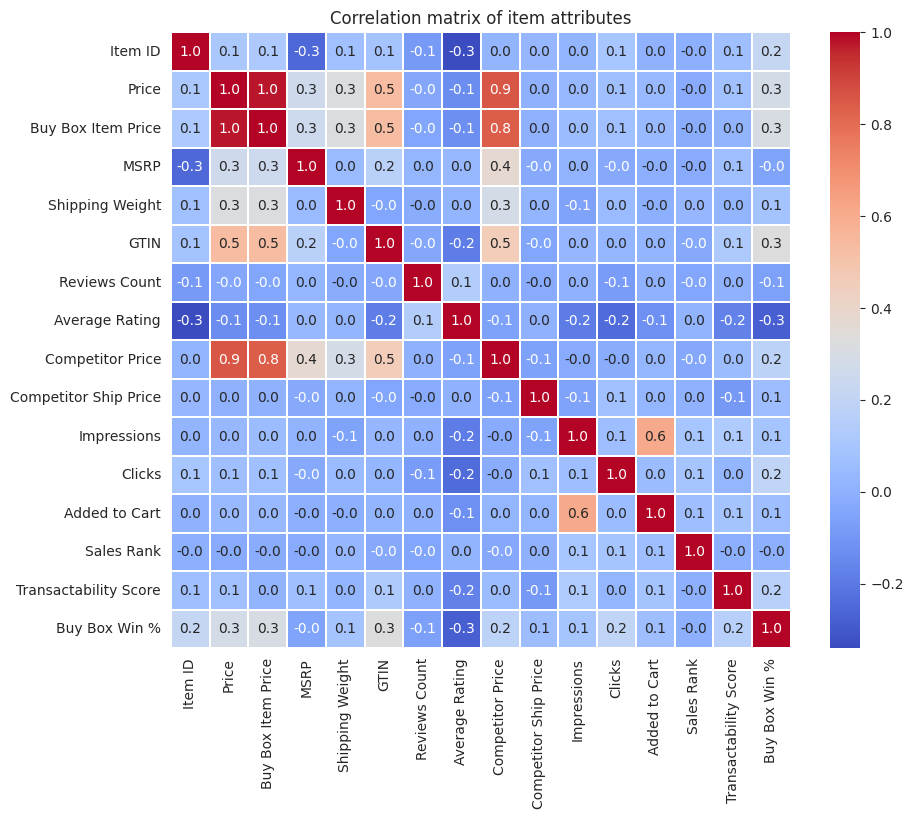

In [44]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = .1)
plt.title('Correlation matrix of item attributes')
plt.show()